In [15]:
import numpy as np 
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [16]:
# import data
cancer = datasets.load_breast_cancer()
X = cancer['data']
y = cancer['target']

In [17]:
def logistic(z):
    return (1 + np.exp(-z))**(-1)

def standard_scaler(X):
    mean = X.mean(0)
    sd = X.std(0)
    return (X - mean)/sd 

In [18]:
class Binary_Logistic_Regression:
    def fit(self, X, y, n_iter, lr, standardize = True, has_intercept = False):
        if standardize:
            X = standard_scaler(X)
        if not has_intercept:
            ones = np.ones(len(y)).reshape(len(y), 1)
            X = np.concatenate((ones, X), axis = 1)
        self.X = X
        self.y = y
        self.N, self.D = self.X.shape
        self.lr = lr
        self.n_iter = n_iter

        beta = np.random.randn(self.D)

        # gradiant decent
        for i in range(self.n_iter):
            
            p = logistic(self.X @ beta) # pn sayed to be sigmoid(B.T @ X)
            # -X.T @ (y - p)
            grad = - self.X.T @ (self.y - p)
            beta -= self.lr * grad
        self.beta = beta 
        self.p = logistic(self.X @ self.beta)
        self.yhat = self.p.round()
            
        

In [19]:
binary_model = Binary_Logistic_Regression()
binary_model.fit(X, y, n_iter = 10**4, lr = 0.0001)
print('In-sample accuracy: '  + str(np.mean(binary_model.yhat == binary_model.y)))


In-sample accuracy: 0.9894551845342706


In [20]:
standard_scaler(X)

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

C:\Users\abdu\AppData\Local\Temp\ipykernel_14112\2449912665.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(binary_model.p[binary_model.yhat == 0], kde = False, bins = 8, label = 'Class 0', color = 'cornflowerblue')
C:\Users\abdu\AppData\Local\Temp\ipykernel_14112\2449912665.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

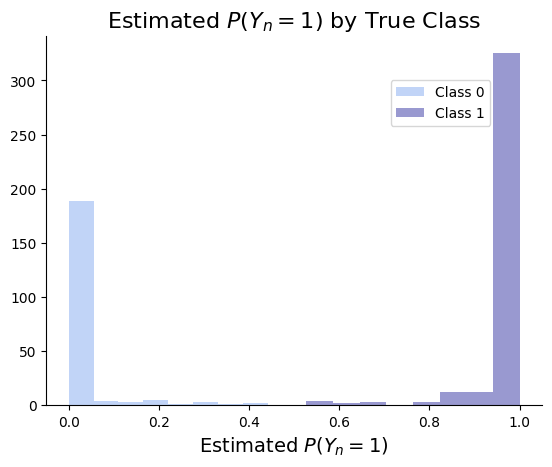

In [21]:
fig, ax = plt.subplots()
sns.distplot(binary_model.p[binary_model.yhat == 0], kde = False, bins = 8, label = 'Class 0', color = 'cornflowerblue')
sns.distplot(binary_model.p[binary_model.yhat == 1], kde = False, bins = 8, label = 'Class 1', color = 'darkblue')
ax.legend(loc = 9, bbox_to_anchor = (0,0,1.59,.9))
ax.set_xlabel(r'Estimated $P(Y_n = 1)$', size = 14)
ax.set_title(r'Estimated $P(Y_n = 1)$ by True Class', size = 16)
sns.despine()

In [22]:
# import data
wine = datasets.load_wine()
X = wine['data']
y = wine['target']
y.shape

(178,)

In [23]:
def softmax(z):
    return np.exp(z)/(np.exp(z).sum())

def softmax_byrow(Z):
    return (np.exp(Z)/(np.exp(Z).sum(1)[:,None]))

def make_I_matrix(y):
    I = np.zeros(shape = (len(y), len(np.unique(y))), dtype = int)
    for j, target in enumerate(np.unique(y)):
        I[:,j] = (y == target)
    return I


Z_test = np.array([[1, 1],
              [0,1]])
print('Softmax for Z:\n', softmax_byrow(Z_test).round(2))

y_test = np.array([0,0,1,1,2])
print('I matrix of [0,0,1,1,2]:\n', make_I_matrix(y_test), end = '\n\n')


Softmax for Z:
 [[0.5  0.5 ]
 [0.27 0.73]]
I matrix of [0,0,1,1,2]:
 [[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]]



In [39]:
# Z^=XB^∈RN×K,
# P^=softmax(Z^)
class Multiclass_logistic_regression:
    def fit(self, X, y, n_iter, lr, standardize = True, has_intercept = False):
        if standardize:
            X = standard_scaler(X)
        if not has_intercept:
            ones = np.ones(len(y)).reshape(len(y), 1)
            X = np.concatenate((ones, X), axis = 1)
        self.X = X
        self.y = y
        self.n_iter = n_iter
        self.lr = lr
        self.K = len(np.unique(self.y))
        self.I = make_I_matrix(self.y)
        self.N, self.D = self.X.shape
        
        B = np.random.randn(self.D*self.K).reshape((self.D, self.K))


        # gradiant descent
        for i in range(self.n_iter):
            z = self.X @ B
            p = softmax_byrow(z)
            # X⊤(I−P).
            grad = self.X.T @ (self.I - p)
            B += self.lr * grad

        self.B = B
        self.P = softmax_byrow(self.X @ self.B)
        self.yhat = self.P.argmax(1)
        

        

In [40]:
multiclass_model = Multiclass_logistic_regression()
multiclass_model.fit(X, y, 10**4, 0.0001)
print('In-sample accuracy: '  + str(np.mean(multiclass_model.yhat == y)))
# multiclass_model.B.shape, multiclass_model.X.shape, multiclass_model.D, multiclass_model.N


In-sample accuracy: 1.0


C:\Users\abdu\AppData\Local\Temp\ipykernel_14112\87073320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(multiclass_model.P[multiclass_model.y == y, i],


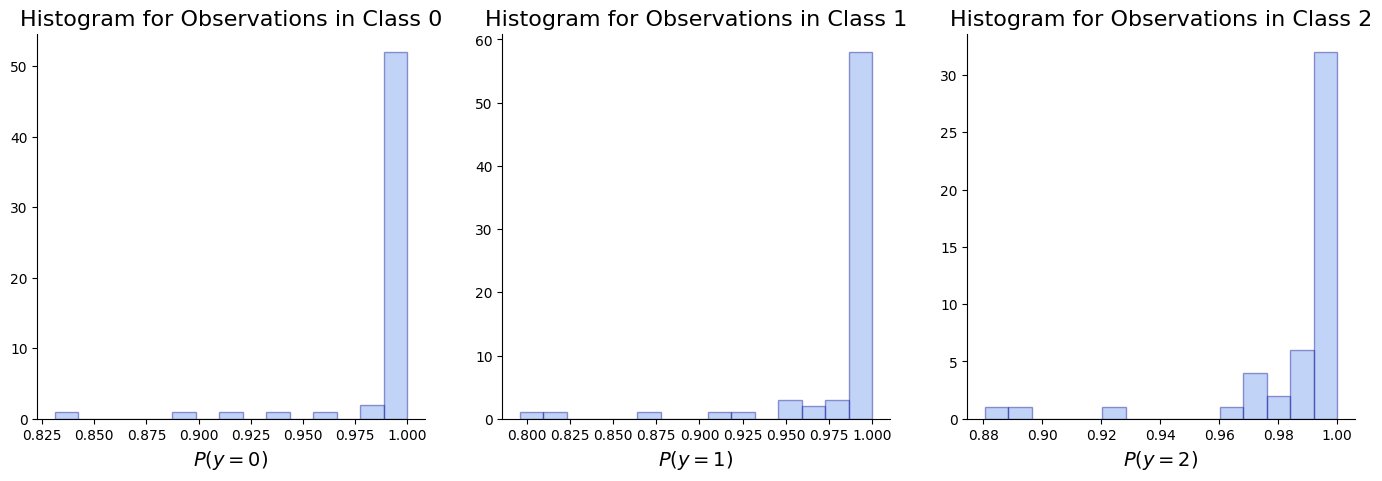

In [12]:
fig, ax = plt.subplots(1, 3, figsize = (17, 5))
for i, y in enumerate(np.unique(y)):
    sns.distplot(multiclass_model.P[multiclass_model.y == y, i],
                 hist_kws=dict(edgecolor="darkblue"), 
                 color = 'cornflowerblue',
                 bins = 15, 
                 kde = False,
                 ax = ax[i]);
    ax[i].set_xlabel(xlabel = fr'$P(y = {y})$', size = 14)
    ax[i].set_title('Histogram for Observations in Class '+ str(y), size = 16)
sns.despine()